In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import nltk
# nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

import re
import gensim

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
sid = SentimentIntensityAnalyzer()
df = pd.read_csv("p_skytrax.csv")

In [3]:
# get the polarity scores and parse them to different columns
df['scores'] = df['cleaned_body'].apply(lambda review: sid.polarity_scores(review))

df['compound_score']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['pos_score']  = df['scores'].apply(lambda score_dict: score_dict['pos'])
df['neu_score']  = df['scores'].apply(lambda score_dict: score_dict['neu'])
df['neg_score']  = df['scores'].apply(lambda score_dict: score_dict['neg'])

In [4]:
# extract the reviews and scores columns to separate df
col_names = ['cleaned_body', 'compound_score', 'pos_score', 'neu_score', 'neg_score']
review_df = df[col_names]
review_df.to_csv("reviews_scores.csv")

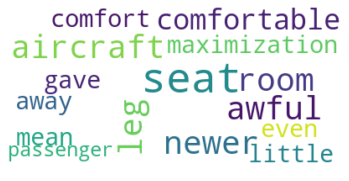

pos_score 0.256
neu_score 0.604
neg_score 0.139
compound_score 0.3626


In [7]:
review = review_df.loc[0]
# print("text",review["cleaned_body"])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(review["cleaned_body"])
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print("pos_score",review["pos_score"])
print("neu_score",review["neu_score"])
print("neg_score",review["neg_score"])
print("compound_score",review["compound_score"])